<a href="https://colab.research.google.com/github/daawonn/dl_project/blob/master/12_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_%EC%A4%91%EC%9A%94%EC%9D%B4%EB%A1%A0%EB%B0%8F%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B5%AC%EC%B6%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자연어 처리 기본 배경이론

- 벡터 공간 모델
  - 각 문서(문장, 코퍼스)는 벡터 공간에 하나의 벡터로 표현된다.
  - 하나의 벡터와 또 다른 벡터가 근거리에(가까운위치에) 존재하면 2개의 의미는 유사하다.
- 통계적 의미론 가설(이하 4개 이론이 배경)
  - Bag of Words
    - 문서의 단어빈도는 질의에 대한 문서의 관련성을 나타내는 경향이 있다
  - 분포가설
    - 비슷한 맥락에서 발생하는 단어는 유사한 의미를 가진다
  - 확장된 분포가설
    - 유사한 쌍으로 발생하는 패턴은 유사한 의미를 가진다
  - 잠재 관계 가설
    - 비슷한 패턴으로 동시에 등장하는 단어의 쌍은 유사한 의미를 가진다

# 단어 임베딩 추가 내용

## 유사도

- 벡터 공간에서 거리가 가까운 벡터는 서로 의미가 유사하다
- 이런 값은 코사인유사도(cosine similiarity)로 구한다


In [0]:
import torch

In [0]:
x1 = torch.FloatTensor( [1,2,3,4] )
x2 = torch.FloatTensor( [1,4,2,1] )

In [0]:
# 두 벡터 사이의 유사도
torch.cosine_similarity( x1, x2, dim=0 )
# 문장의 뉘앙스가 어느쪽에 더 가깝다와 같은 의미론적인 해석이 더 가능해진다

tensor(0.7396)

- 코사인 유사도는 백터라 촘촘한 형태인 경우에 성능이 잘 발현된다. 밀집벡터여야 한다
- Bag of Words기밥으로 원-핫 인코딩으로 사용할 수 있다
  - 총 단어의 수대로 벡터를 만들고
  - 해당하는 단어의 인덱스만 1, 나머지는 0
  - 원-핫 인코딩으로 표현( 0 - 코사인 유사도는 백터라 촘촘한 형태인 경우에 성능이 잘 발현된다. 밀집벡터여야 한다
  - Bag of Words기밥으로 원-핫 인코딩으로 사용할 수 있다
    - 총 단어의 수대로 벡터를 만들고
    - 해당하는 단어의 인덱스만 1, 나머지는 0
    - 원-핫 인코딩으로 표현( 0 or 1 표현) 이런 벡터가 2개 있다고 치면 코사인 유사도를 측정하면 항상 0이 된다
    

In [0]:
x3 = torch.FloatTensor( [1,0,0,0] )
x4 = torch.FloatTensor( [0,1,0,0] )
torch.cosine_similarity( x3, x4, dim=0 )
# 원-핫 인코딩 데이터로 코사인 유사도 측정 = 0 

tensor(0.)

- 이런 문제 때문에 0과 1이 아닌 실수 차원으로 단어를 표현하는 것을 임베딩(embeding)이라고 한다


In [0]:
# 별도의 형태소 분석기 없이 공백 기반으로 토큰을 분리
tokens = 'We are going to study HanGaram IT school'.split() # 원문 , 사전
new_txt ='We are HanGaram'.split() # 새로운 문장
tokens , new_txt

(['We', 'are', 'going', 'to', 'study', 'HanGaram', 'IT', 'school'],
 ['We', 'are', 'HanGaram'])

In [0]:
# 단어장 구성 ( We :0, .. )
vocab = dict()
for token in tokens:
  if not token in vocab :
    vocab.setdefault(token,len(vocab))
vocab    

{'HanGaram': 5,
 'IT': 6,
 'We': 0,
 'are': 1,
 'going': 2,
 'school': 7,
 'study': 4,
 'to': 3}

In [0]:
# 단순하게 표현 - 리스트 내포
vocab = { token:index for index,token in enumerate(tokens)}
vocab

{'HanGaram': 5,
 'IT': 6,
 'We': 0,
 'are': 1,
 'going': 2,
 'school': 7,
 'study': 4,
 'to': 3}

In [0]:
# 사전의 개수가 8개, 임베딩으로 표현하는것이 3개(설정)라고 한다면
# 임베딩된 행렬은 8x3, 임의로 값을 부여하여서 구성
# 사전을 임베딩하여 행렬로 표현한것
embedding = torch.FloatTensor([ 
                               [1,5,7],
                               [2,1,8],
                               [1,4,5],
                               [4,1,1],
                               [1,8,9],
                               [6,1,10],
                               [3,2,2],
                               [1,5,4]
])
embedding

tensor([[ 1.,  5.,  7.],
        [ 2.,  1.,  8.],
        [ 1.,  4.,  5.],
        [ 4.,  1.,  1.],
        [ 1.,  8.,  9.],
        [ 6.,  1., 10.],
        [ 3.,  2.,  2.],
        [ 1.,  5.,  4.]])

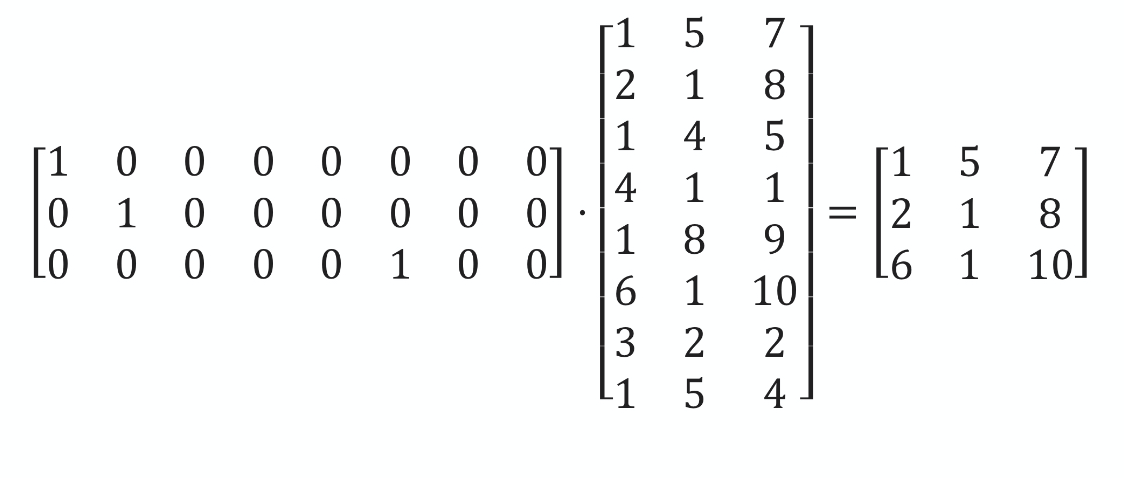

In [0]:
from IPython.display import Image
Image('/content/조회한다_원핫인코딩단어와임베딩행렬과행렬간의곱셈.png', width=400)
# 문장이 원핫인코딩으로 표현되어 있다면 이를 임베딩된 사전과 행렬의 곱을 수행하면
# 문장 데이터로 인베딩된 데이터로 표현이 되어, 자연어 처리에 기본이 되는 코사인유사도 측정이 가능하다

In [0]:
# new_txt 처리
indexs = torch.LongTensor( [ vocab[token] for token in new_txt ] )
embedding[indexs, :]

tensor([[ 1.,  5.,  7.],
        [ 2.,  1.,  8.],
        [ 6.,  1., 10.]])

In [0]:
new_txt

['We', 'are', 'HanGaram']

- 임베딩간에 행렬의 곱을 사용하므로 -> 신경망에서 W(가중치, 매개변수)를 최적화할때 사용하는 역전파 방법이 가능하다

In [0]:
# 파이토치로 처리
import torch.nn as nn
em_layer = nn.Embedding( num_embeddings = len(vocab),
                        embedding_dim   = 3,
                        _weight         = embedding )

In [0]:
em_layer(indexs)

tensor([[ 1.,  5.,  7.],
        [ 2.,  1.,  8.],
        [ 6.,  1., 10.]], grad_fn=<EmbeddingBackward>)

## Word2Vec

- Word2Vec
  - 중심 단어를 기준으로 주변 단어를 예측 => Skip-Gram : 1
  - 주변 단어를 기준으로 중심 단어를 예측 => CBoW : 0
- gensim
  - 이미 훈련된 임베딩 벡터를 초기화하여 전이학습처럼 활용할 수 있다
  - 학습이 수행된 모델을 로드해서 => 그 지점부터 다시 학습이 이어지는 => 모델의 업그레이드 수행


In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 221kB/s 
     |████████████████████████████████| 2.3MB 28.8MB/s 
     |████████████████████████████████| 92kB 11.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

     |████████████████████████████████| 92kB 4.2MB/s 
  Created wheel for JPype1-py3: filename=JPype1_py3-0.5.5.4-cp36-cp36m-linux_x86_64.whl size=2696021 sha256=1db5776e2a21d49f5003a326a97c6155fcfbb88b20a00adae2326546032fc6c6
  Stored in directory: /root/.cache/pip/wheels/52/37/1f/1015d908d12a0e9b239543d031fda0cded9823aa1306939541
Successfully built JPype1-py3


In [0]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [83.1 kB]
Get:14 http://a

In [0]:
import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install


In [0]:
import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

In [0]:
# install mecab-python
import os
os.chdir('/content')

In [0]:
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

In [0]:
!python3 setup.py build
!python3 setup.py install

In [0]:
# word2vec
from konlpy.tag import Mecab
from gensim.models.word2vec import Word2Vec

mecab = Mecab()

In [0]:
# tokenizer 함수 => 텍스트(하나의 문장)를 형태소 분해해서 태그를 붙여서 리턴
tokenizer = lambda x : [ '%s/%s' % (token.lower(),tag.lower())  for token, tag in mecab.pos( x ) ]
'''
def tokenizer( sentence ):
  # [('오늘','MAG'), ...]
  tmp = []
  for token, tag in mecab.pos( sentence ):
    # '오늘/MAG' 형태로 변경
    # '%s/%s' % (token.lower(),tag.lower())
    tmp.append('/'.join((token.lower(),tag.lower())))
'''
# ratings.txt 다운로드
with open('/content/ratings.txt','r') as f:
  # 줄단위로 나눠서 처리
  raw_data =f.read().splitlines()[1:] # skip_header
  # 데이터 한개는 \t로 구분되어있다
  # => [['어릴때보고....','1' ],['디자인을배우는...','0'],...]
  data = [ line.split('\t')[1] for line in raw_data ]
  # 토큰화 => [ (['','',''],1),(),() ]
  data = [ tokenizer(sentence) for sentence in data ]

- 2003년 NNLM(Neural Network Language Model)에서 이전 단어 정보로 다음 단어를 예측하는 딥러닝 모델을 제시
- We are going ___ <= to를 예측이 되게 임베딩행렬 C를 학습하고 강화하는것을 목적으로한다


In [0]:
# data 20000개 : [['형태소/태그'],['형태소/태그'], ...]
# sentences    : 문장 데이터 입혁, [['토큰화된문장'],...]
# size         : 임베딩 벡터의 크기 (None, 100)
# window       : 중심 단어로 부터 살필 주변의 단어의 크기 => top5
# min_count    : 단어의 최소 등장 횟수, 만약 3이라면 3번 이상 등장한 형태소가 대상이 된다
# sg           : 1 or 0
model = Word2Vec(sentences=data, size=100, window=4, min_count=3, sg=1)
# 중심단어를 기반으로 주변 단어를 예측하는 모델

In [0]:
# 훈련 완료후 필요 없는 메모리 정리
model.init_sims(replace=True)

In [0]:
# 단어 임베딩 행렬 크기
model.wv.vectors.shape

(30311, 100)

In [0]:
# 모델 덤프(저장) => 다음번 작업시 로드하여 이어서 학습을 추가할 수 있다
model.wv.save_word2vec_format('./w2v.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## 유사도 확인

In [0]:
# 데이터는 모델 학습시 사용했던 형태
#  [['형태소/태그'],['형태소/태그'], ...]
model.wv.similarity( *tokenizer('여배우 배우 ') )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.80236393

In [0]:
# 배우라는 텍스트는 여배우를 지칭하는 쪽으로 더 많이 사용되었다 0.80236393 > 0.6355331
model.wv.similarity( *tokenizer('남배우 배우 ') )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6355331

In [0]:
# 중심단어 스토리의 주변단어 5개를 유사도 순으로 획득
model.wv.most_similar( *tokenizer('스토리'), topn=5 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('전개/nng', 0.833028256893158),
 ('시나리오/nng', 0.8066726922988892),
 ('줄거리/nng', 0.7924842834472656),
 ('내용/nng', 0.784312903881073),
 ('구성/nng', 0.7743903398513794)]

In [0]:
# 남자 배우 - 남자 => 배우(=>연기자) : 벡터 연산 처리시 => 어떤 단어가 나오는가?
# 남자배우라는 단어에서 남자를 빼면 => 배우에 관련된 유사도가 나오면 된다
# 임베딩 벡터가 단어의 의미를 표현하고 있다

model.wv.most_similar( positive = tokenizer('남자배우'),
                       negative = tokenizer('남자'),
                       topn = 5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('연기자/nng', 0.8152772784233093),
 ('여배우/nng', 0.8023638725280762),
 ('명배우/nng', 0.7467695474624634),
 ('출연진/nng', 0.7428311705589294),
 ('조연/nng', 0.7323895692825317)]

## 사전훈련 데이터의 임베딩 벡터

- 이미 학습이 수행된 임베딩 벡터를 사용해서 모델의 성능을 더욱 더 향상시킬 수 있다


In [0]:
from torchtext.data import Field
from konlpy.tag import Mecab

In [0]:
# 형태소 분석기
mecab = Mecab()
# 데이터를 훈련시 형태와 동일하게 구성
tokenizer = lambda x : [ '%s/%s' % (token.lower(),tag.lower())  for token, tag in mecab.pos( x ) ]

In [0]:
# ratings.txt 대비한 필드 정의
TEXT = Field(
    sequential  = True ,            # 시퀀스 데이터가 맞다
    use_vocab   = True,             # 사전을 사용하겠다
    tokenize    = mecab.morphs, # 형태소 분석기로 이 함수를 사용하겠다
    lower       = True ,            # 대문자를 소문자로 처리
    batch_first = True,             # 배치사이즈는 앞으로 위치
)

# 긍/부정에 대한 필드
LABEL = Field( 
    sequential    = False, # 0 or 1
    use_vocab     = False,  # 사전사용안함
    batch_first   = True,
    preprocessing = lambda x: int(x),  # 정수처리
    is_target     = True # 타겟 데이터 맞음 => y
)

# 리뷰의 순서에 대한 필드(단, 사용하지는 않을것이다)
ID = Field(
    sequential = False,
    use_vocab  = False,
    is_target  = False
)

In [0]:
from torchtext.data import TabularDataset
dataset = TabularDataset( path       = '/content/ratings.txt' ,                    # 데이터 파일의 위치, 경로
                         format      = 'tsv',                                      # tab으로 분리되어있다 tsv, csv, json 등이 가능
                         fields      = [('id',ID),('text',TEXT),('label',LABEL)] , # (필드를 호출할 닉네임,필드)
                         skip_header = True                                        # 데이터의 첫 줄은 헤더로 생략한다
                          )

In [0]:
# 훈련된 임베딩 행렬을 사용하기 위해서 벡터 객체를 생성하여 사전 빌드시 전달
from torchtext.vocab import Vectors
# 저장한 모델(임베딩 행렬)을 로드하여 벡터에 담는다
vectors = Vectors( name='w2v.model' )

 96%|█████████▌| 29170/30311 [00:01<00:00, 19678.56it/s]


In [0]:
# 벡터를 단어장 생성시 연결
TEXT.build_vocab( dataset, min_freq=3, vectors=vectors )
# 단어장에서 빈도 3이상 나오는 단어만 가지고 처리되었다
TEXT.vocab.vectors.size()

torch.Size([26234, 100])

In [0]:
# 표현 임베딩층 
# 사전에 훈련된 데이터를 사용하여서 임베딩층을 생성
# freeze = False 가 되어야 추가적인 학습이 가능하게된다 (중요!!!!)
embedding = nn.Embedding.from_pretrained( TEXT.vocab.vectors, freeze = False )

# 순환 신경망 

## RNN

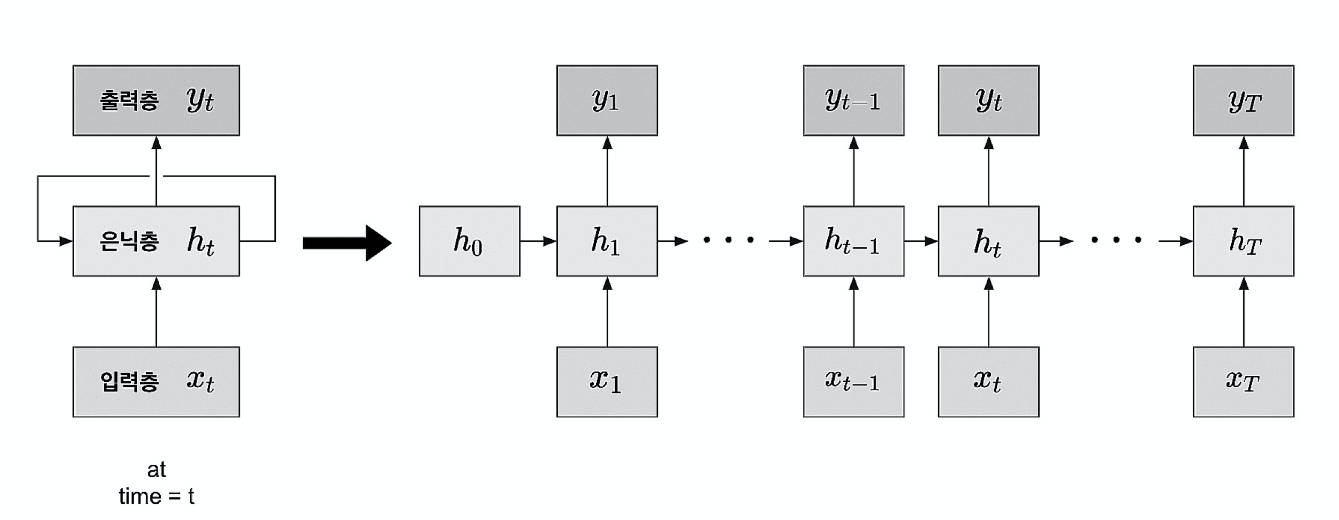

In [0]:
from IPython.display import Image
Image('/content/RNN구조.png',width = 550)

- FeedForword Neural Network
- 다루는 데이터는 : 시퀀스 데이터이다
  - 주식, 문장, 센서데이터 들 순서를 가진 연속적인 데이터이다
  - 순서를 가졌다 => 시간을 가졌다 => 이런 시간을 전달하면서 모델링 할 수있는 신경망 구조를 순환신경망, RNN이라고 한다

- 용어 정리
  - 시간 : t => time-step (타임 스텝)
  - 이전 시간 : t - 1
  - 다음 시간 : t + 1
  - 순환 신경망은 이전 타임 스텝의 정보를 현재 타임 스텝의 입력으로 받는다( 연속성이 생긴다 )  

- 활성화 함수
  - 순환 신경망은 주로 tanh를 사용한다
- hh
  - h : Hidden layer (은닉층)
  - hh : Hidden layer => Hidden layer 
    - 이전 은닉층 -> 다음 은닉층으로 가는 매개변수값, hh를 붙여서 표현
- xh
  - x : Input layer (입력층)
  - xh : Input layer => Hidden layer 
    - 입력층 -> 은닉층으로 가는 매개변수값(선형결합의 가중치)과 편향값, xh를 붙여서 표현    

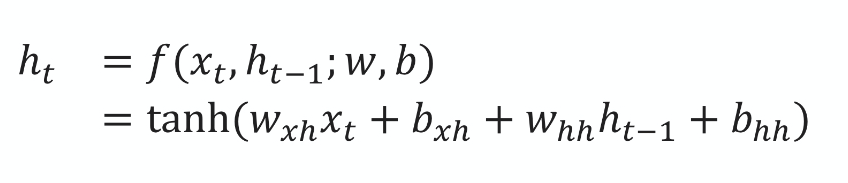

In [0]:
Image('/content/순환신경망순방향전파.png',width = 550)

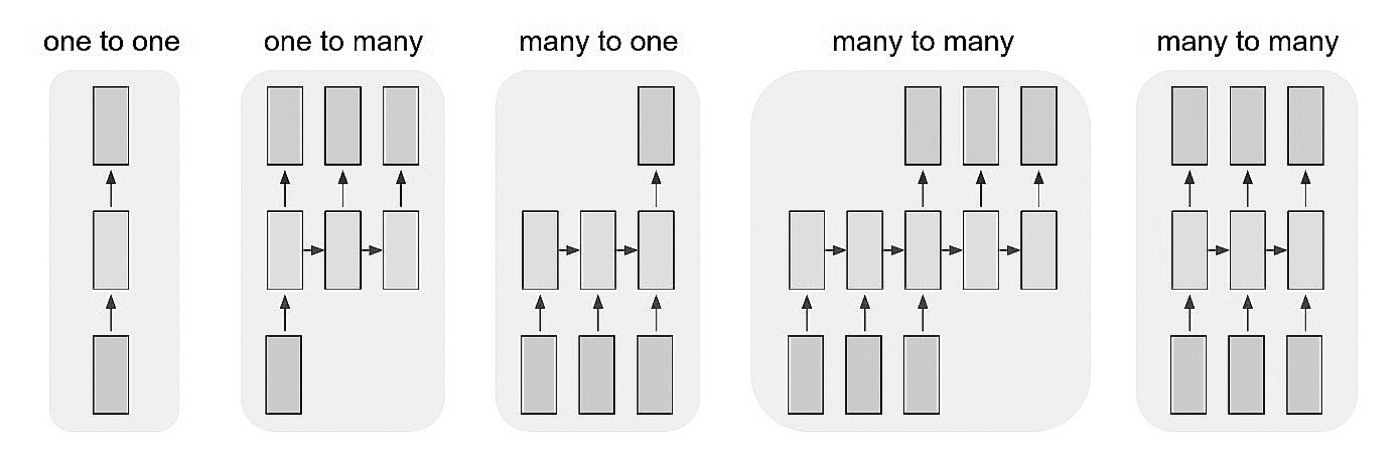

In [0]:
Image('/content/순환신경망의장점.png',width = 550)
# 프로젝트 용도에 따라 순환신경망은 각각 달라지고 이에따른
# 출력값(Yt), 현재정보(Ht)등의 정보가 진행하는 방향이 달라질 수 있다
# 위의 그림은 다-대-다 형태를 취한다

- one-to-one
  - 타임 스텝이 1, 일반적인 순방향 신경망과 동일한 구조를 가진다
- one-to-many
  - 하나의 입력, 여러개의 출력 -> Image Captioning : 이미지를 설명하는 문장을 생성한다
- many-to-one 
  - 여러개의 입력을 받고, 하나의 출력을 생성 => 감정분류(Sentiment Classification)
- many-to-many
  - case 1
    - 여러개의 입력을 받고 마지막 은닉층에서 모든 정보를 모아서 여러개의 출력을 생성한다 : 기계번역
  - case 2  
    - 여러개의 입력을 받고 동시에 여러개의 출력을 생성 : 영상의 여러 프레임을 입력으로 받아서 어떤 내용인지 분류하는 분야  

- 원리
  - 1. 입력 : 현재 타임스탭(t)의 입력정보 Xt
  - 2. 활성화 : 활성화 함수는 tanh를 주로 사용 => 활성화함수를 통과한다(비선형으로 만든다), 활성화함수로 들어오는 재료는 선형(행렬의 곱) => 활성화 함수를 통과하면 Ht 가 도출 => 출력값으로 이동
  - 3. 다음단계 : 출력값(Yt)는 다음 타임 스템(t+1)

### RNN Cell : 은닉층을 구현한 모듈
- 입력 : Xt, Ht-1 을 받고 현재 타임 스텝의 출력값 Ht를 도출하는 과정
- 이렇게 총 길이 => T(총시간)만큼 타임 스텝을 순방향으로 전파하여 학습이 진행


In [0]:
# 모듈가져오기
# deep learning 엔진
import torch

# 전처리 모듈
from torchtext.data import Field
from torchtext.data import TabularDataset
from torchtext.data import Iterator
from konlpy.tag import Mecab

# rnn 신경망 구축관련 모듈
import torch.nn as nn

# train 관련 모듈
import torch.optim as optim # 경사하강법

In [0]:
# 동일한 실험 환경 구성 => 최적화 포인트(요인) 확인하기 위해서
torch.manual_seed( 1004 )

In [0]:
# 1. 데이터 전처리 -> Field
# 멤버 호출 => 객체명.멤버
# 클래스 안에서 자기 자신 객체 => self or this( 타언어, java~ )
class MySentenceField(  ):
  # 멤버변수 정의
  TEXT = None
  '''
  torchtext의 데이터 전처리 절차를 수행하는 클래스
  - 데이터 정의
  - 데이터셋 구성
  - 사전(단어장) 생성
  - 데이터로더 생성
  '''
  def __init__(self, src, format, batch_size):
    # 연산 디바이스
    # device = 참일때 if 조건(현재 토치에서 cuda를 사용할 수 있는가?)
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu' 
    # initXXX() <-> freeXXX()
    # createXXX() <-> destoryXXX()
    # 데이터 초기화
    self.initField()
    # 데이터셋 구성
    self.initData(src,format)
    # 사전(단어장) 생성
    self.createVocab()
    # 데이터로더 생성
    self.initLoader(batch_size)
    pass
  def initField(self):
    # Field의 정의 개수는 데이터의 컬럼수에 맞춰서 정의(현재는 1개라서 1개만 정의)
    # 지역 변수로 형태소 분석기 생성
    self.mecab = Mecab()
    # Field -> myData.text의 데이터 중 contents 파트(컬럼)의 내용을 담당하는 객체
    # Field를 생성하는 멤버 변수를 구성한다
    # 원 데이터의 형태를 보고 필드의 수와 성분을 결정한다
    self.TEXT =  Field(
    sequential  = True ,            # 시퀀스 데이터가 맞다
    use_vocab   = True,             # 사전을 사용하겠다
    tokenize    = mecab.morphs,     # 형태소 분석기로 이 함수를 사용하겠다
    lower       = True ,            # 대문자를 소문자로 처리
    batch_first = True              # 배치사이즈는 앞으로 위치
    )
    pass
  def initData(self,src,format):
    # TabularDataset 을 만드는데 원 데이터 주입
    self.dataset = TabularDataset( 
                        path        = src,                   # 데이터 파일의 위치, 경로
                        format      = format,                  # tab으로 분리되어있다 tsv, csv, json 등이 가능
                        fields      = [('text',self.TEXT)] ,  # (필드를 호출할 닉네임,필드)
                        skip_header = True                    # 데이터의 첫 줄은 헤더로 생략한다
                          )
    pass
  def createVocab(self):
    # 사전구성
    self.TEXT.build_vocab( self.dataset )
    pass
  def initLoader(self,batch_size):
    self.dataLoader = Iterator( 
                          dataset    = self.dataset,
                          batch_size = batch_size,   # 설정값, 배치크기
                          device     = self.device   # gpu 혹은 cpu 사용
                      ) 
    pass    
  def test(self):
    # 데이터 확인
    # 사전의 개수
    print('사전의 토큰 개수', len(self.TEXT.vocab))
    print('특정 토큰의 문자열을 넣으면 인덱스값 획득(인코딩)',self.TEXT.vocab.stoi['축구'] )
    # 사전의 토큰을 나열해서 확인
    # 인덱스 => 사전에서 => 토큰획득
    for idx in range(len(self.TEXT.vocab)):
      # 인덱스 -> 토큰(형태소) : 디코딩
      print( idx, self.TEXT.vocab.itos[idx] ) 

  # encode 함수를 구현하시오
  # 입력으로 문자열 -> 리턴값이 사전으로 매칭하여서 리스트로 리턴 => 2차원 텐서로 리턴(업그레이드)
  def encode(self,src):
    # if self.TEXT and self.mecab:
    return self.TEXT.process( [self.mecab.morphs( src )] ).to(self.device)
    #return []

   
  def splitTrainTarget(self,src):
    # 인코딩
    oriData = self.encode(src)
    # 대상 데이터 획득 및 리스트 변환 후 데이터 처리
    # 텐서에서 직접 조작해서 처리도 가능하다 (나중에 해보기!!)
    x_raw = oriData.squeeze().tolist()[:-1]
    t_raw = oriData.squeeze().tolist()[1:]
    x     = torch.LongTensor(x_raw).unsqueeze(0)
    t     = torch.LongTensor(t_raw).unsqueeze(0)
    return x,t

  def decode(self,src):
    return ' '.join([ self.TEXT.vocab.itos[idx] for idx in src ])

In [0]:
# 데이터 전처리 객체 생성
mySentData = MySentenceField( src = '/content/mydata.txt', format='tsv', batch_size=3 )

In [0]:
mySentData.encode('영국 리그로 돌아가고 싶어')

tensor([[8, 5, 4, 3, 2, 6, 7]])

In [0]:
# 테스트
mySentData.test()

사전의 토큰 개수 10
특정 토큰의 문자열을 넣으면 인덱스값 획득(인코딩) 9
0 <unk>
1 <pad>
2 고
3 돌아가
4 로
5 리그
6 싶
7 어
8 영국
9 축구


In [0]:
# 데이터 확인
# 사전의 개수
print('사전의 토큰 개수', len(mySentData.TEXT.vocab))
print('특정 토큰의 문자열을 넣으면 인덱스값 획득(인코딩)',mySentData.TEXT.vocab.stoi['축구'] )
# 사전의 토큰을 나열해서 확인
# 인덱스 => 사전에서 => 토큰획득
for idx in range(len(mySentData.TEXT.vocab)):
  # 인덱스 -> 토큰(형태소) : 디코딩
  print( idx, mySentData.TEXT.vocab.itos[idx] )

사전의 토큰 개수 10
특정 토큰의 문자열을 넣으면 인덱스값 획득(인코딩) 9
0 <unk>
1 <pad>
2 고
3 돌아가
4 로
5 리그
6 싶
7 어
8 영국
9 축구


In [0]:
# 순환 신경망 구성 클래스
# 1. nn.Module 상속 
class MyRNN(nn.Module):
  # 2. 생성자 구현
  def __init__(self, vocab_size, input_size, hidden_size, batch_first=True):
    # 2-1. 생성자 첫번째 코드는 부모 생성자를 호출
    super( MyRNN,self ).__init__()
    # 2-2. 레이어 생성
    # 임베딩층 : 인덱스화한 데이터가 임베딩층에 입력(입력부분) => 단어 임베딩(사전크기, 입력크기)
    self.embedding_layer = nn.Embedding(num_embeddings = vocab_size , embedding_dim = input_size )
    # RNN or LSTM or GRU 등 레이어층 생성 (XXX Cell)
    # 임베딩층의 입력 차원, 은닉층의 크기, batch_first
    self.rnn_layer       = nn.RNN( input_size , hidden_size , batch_first = batch_first )
    # 선형층 (은닉층 => 사전)
    self.linear          = nn.Linear( hidden_size, vocab_size )
  # 3. 신경망 구성(레이어 연결) 
  # 외부에서 model(x)을 호출하면 forward(x)가 작동한다 : 순방향 전파
  def forward(self, x): # 신경망 구성(nn.Module을 상속 받았다면 필수)
    '''
    텐서 크기 변화를 표시하기 위해 기호 정의
    - V : 단어장(사전)의 크기, 등록된 형태소의 총개수
    - T : 시퀀스의 총 길이(총시간)
    - B : (미니)배치의 크기
    - E : 임베딩의 크기 == RNN 입력층의 크기
    - D/H : RNN의 은닉층
    '''
    # 1. 데이터가 임베딩층을 통과해서 분산방식으로 단어를 표현 <- 단어 임베딩
    # x      => [1,7]
    output = self.embedding_layer( x )
    print('output =>', output.size())
    # output => (1,7,5) input_size  = 5 
    # --------------------------------------------------------------------------
    # 2. RNN 층 => RNN Cell 구성 => 출력 2개 : 출력, 은닉층
    # output => (1,7,5) input_size  = 5 
    output, hidden = self.rnn_layer(output)
    # output => ( 1,7,10 ) hidden_size = 10 => (B,7,10) : 1차원이 batch_size 만큼 적용된다. 현재는 1
    print('output2 =>', output.size())
    # hidden => ( 1,7,10 )
    print('hidden =>', hidden.size())

    # 3. 최종 출력층
    # output => (1, 7, 10) => (B, 7, 10) => (B, 7, D or H )
    output = self.linear(output)
    # output => (1, 7, 10) => (B, 7, V)

    # 4. 리턴
    # output.size(2) => 10 => V
    # -1 => 1*7 => 1*T(문장의 토큰이 나오는 순서 T, 시간관점으로 대비)
    # ( 1*7, V ) => ( 1*7, 10 )
    return output.view(-1,output.size(2))

In [0]:
# 순환 신경망 구성 클래스 주석없는 ver
class MyRNN(nn.Module):
  def __init__(self, vocab_size, input_size, hidden_size, batch_first=True):
    super( MyRNN,self ).__init__()
    self.embedding_layer = nn.Embedding(num_embeddings = vocab_size , embedding_dim = input_size )
    self.rnn_layer       = nn.RNN( input_size , hidden_size , batch_first = batch_first )
    self.linear          = nn.Linear( hidden_size, vocab_size )
  def forward(self, x): 
    output = self.embedding_layer( x )
    output, hidden = self.rnn_layer(output)
    output = self.linear(output)
    return output.view(-1,output.size(2))

In [0]:
# 임계값, 실험치, 설정값
vocab_size  = len( mySentData.TEXT.vocab ) # 단어장(사전)의 크기(사전에 등록된 형태소의 총개수)
input_size  = 5                            # 임베딩된 단어의 표현을 5D로 하겠다, 설정값
hidden_size = 10                           # 은닉층의 크기, 설정값
batch_first = True                         # (1,28,28,) => first

# 순환신경망 모델 생성
model = MyRNN(vocab_size, input_size, hidden_size, batch_first)

### 학습을 위한 데이터준비
- /content/mydata.txt : 사전을 구축하기 위한 데이터
- 학습용 데이터 : 
  - '영국 축구 리그로 돌아가고 싶어' 사용
  - 타겟 데이터 : 
    (영국,축구), (축구,리그), (리그,로)...
    임의로 문자를 만들기 위해서 형태소 다음 형태소를 타겟으로 잡겠다.

In [0]:
# 3. 학습, 평가, 예측, 결과물(시스템통합)
# 크로스엔트로피, 경사하강법(최적화), 역전파를 통한 최적화, 학습, 평가, 예측

In [0]:
# 학습용 데이터( 피쳐데이터, 타겟데이터(레이블) 준비 )
oriData = mySentData.encode('영국 축구 리그로 돌아가고 싶어')
oriData.dtype, type(oriData), oriData.size(), oriData.squeeze(0)

(torch.int64,
 torch.Tensor,
 torch.Size([1, 8]),
 tensor([8, 9, 5, 4, 3, 2, 6, 7]))

In [0]:
# 문자열로 다시 복원
for i in oriData.squeeze().tolist():
  print(mySentData.TEXT.vocab.itos[i])

영국
축구
리그
로
돌아가
고
싶
어


In [0]:
# 대상 데이터 획득
x_raw = oriData.squeeze().tolist()[:-1]
t_raw = oriData.squeeze().tolist()[1:]
x_raw, t_raw

([8, 9, 5, 4, 3, 2, 6], [9, 5, 4, 3, 2, 6, 7])

In [0]:
# 텐서로 조정 => 준비 완료
# 사전값의 텐서 타입은 LongTensor(int64)이다
x = torch.LongTensor(x_raw).unsqueeze(0)
t = torch.LongTensor(t_raw).unsqueeze(0)
x,t

(tensor([[8, 9, 5, 4, 3, 2, 6]]), tensor([[9, 5, 4, 3, 2, 6, 7]]))

In [0]:
x,t = mySentData.splitTrainTarget('영국 축구 리그로 돌아가고 싶어')
x,t

(tensor([[8, 9, 5, 4, 3, 2, 6]]), tensor([[9, 5, 4, 3, 2, 6, 7]]))

### 학습시작 
- 반복작업을 통해서 알고리즘이 개선, 점점 문장이 완성되간다

In [0]:
# sentences history
sentences = list()
def train():
  # 손실함수 정의
  loss_function = nn.CrossEntropyLoss()
  # 최적화(옵티마이저) 생성
  optimizer     = optim.Adam( params = model.parameters() )


  for step in range(150+1): # step은 0 ~ 150
    # 경사하강법 초기화
    optimizer.zero_grad()
    # 순방향 전파
    output = model(x)
    # 손실값 계산
    loss   = loss_function( output, t.view(-1) )
    # 역방향 전파 -> 출력에서 입력까지 거꾸로 전파되면서 입력에 도착할 수 있게 매개변수를 조정하는 과정
    loss.backward()
    # 매개변수 업데이트
    optimizer.step()
    # 로그 출력
    if step % 10 == 0:
      print('-'*30)
      print('%s번 로그 출력' %  (step + 1))
      print('output.shape',     output.size())


      
      print('t.view(-1).shape', t.view(-1).size())
      print('손실값 : %s',      loss)
      # output을 처리해서 => [ 2,3,1,3,... ]
      print(output)
      # softmax(-1) => 값을 활성화 함수를 통과처리
      print(output.softmax(-1))
      # argmax(-1)  => 값들 중 가장 큰 값의 인덱스를 취하고
      print(output.softmax(-1).argmax(-1))
      # tolist()    => 리스트로 표현
      pred = output.softmax(-1).argmax(-1).tolist()
      print(pred)
      # 디코딩 => 문장을 완성
      # print('문장 완성 결과', mySentData.decode(pred))
      sentences.append( mySentData.decode(pred) )
      print('-'*30)

train()
print( sentences )

------------------------------
1번 로그 출력
output.shape torch.Size([7, 10])
t.view(-1).shape torch.Size([7])
손실값 : %s tensor(0.0723, grad_fn=<NllLossBackward>)
tensor([[-0.8592, -0.6587, -1.4665, -0.3903, -0.7546,  1.5941, -0.9029,  0.8333,
         -0.4772,  4.9122],
        [-0.5139, -0.1731, -1.9246, -1.4828,  1.3821,  5.2014, -0.4722, -2.0501,
         -0.8985,  1.3685],
        [-1.0652, -1.0245, -1.9738,  1.5679,  5.0943,  1.0695, -1.0084,  0.2313,
         -0.3572, -1.6653],
        [-1.6538, -1.4358, -0.1131,  4.6519,  0.8403, -2.4569,  1.4999,  0.5041,
         -1.0594, -1.2732],
        [-0.6643, -0.4936,  5.2055, -0.9793, -3.4238, -1.9839,  0.9659,  1.5072,
         -0.1858, -0.6715],
        [-1.3507, -0.6185,  0.7394,  0.6405, -1.3103, -1.0183,  4.4332, -0.0108,
         -1.0101, -1.3262],
        [-2.2377, -2.9114,  0.1934,  0.3975,  0.5693, -1.8173, -0.0313,  4.6959,
         -1.4851,  1.0260]], grad_fn=<ViewBackward>)
tensor([[2.8907e-03, 3.5324e-03, 1.5749e-03, 4.6199e-03

In [0]:
# 2. 신경망 설계
# 간단하게 RNN을 구현

# 단위 class
# Yh = tanh(WxhXt + Bxh + WhhHt-1 + Bhh) <= RNN Cell을 구현 <= nn.RNN() 구현되어 있다
# 순환 신경망 코드 => RNN Cell, LSTM Cell, GRU Cell이런 부분 중심으로 은닉층 설계를 확인
# nn.Module을 상속받고 구현하면서 신경망 구성이 시작된다
class MyRNN(nn.Module):

  # 2. 신경망 설계
  '''
  생성자 : 임계값들이 전달, 입력층 shape 크기, 은닉층 shape크기, batch_size, batch_first 
  '''
  def __init__(self):
    pass
  # 멤버 함수
  '''
  층 쌀기 함수 => 순환층을 만드는, 레이어끼리 연결하는 과정을 만들어주자 => 순방향
  '''
  # def initForward(self):
  def forward(self, x): # 신경망 구성(nn.Module을 상속 받았다면 필수)
    pass
  '''
  은닉층 생성 (입력과 이전단계은닉 결합)
  '''
  def rnn_cell(self):
    pass
  '''
  개별 은닉층에 대한 초기화 
  ''' 
  def initHiddenLayer(self):
    pass
  '''
  W에 대한 초기화 함수
  '''  
  def initWeight(self):
    pass
  

## 순환 신경망 설계 방식에 따른 장점

## 순전파, 역전파

## LSTM

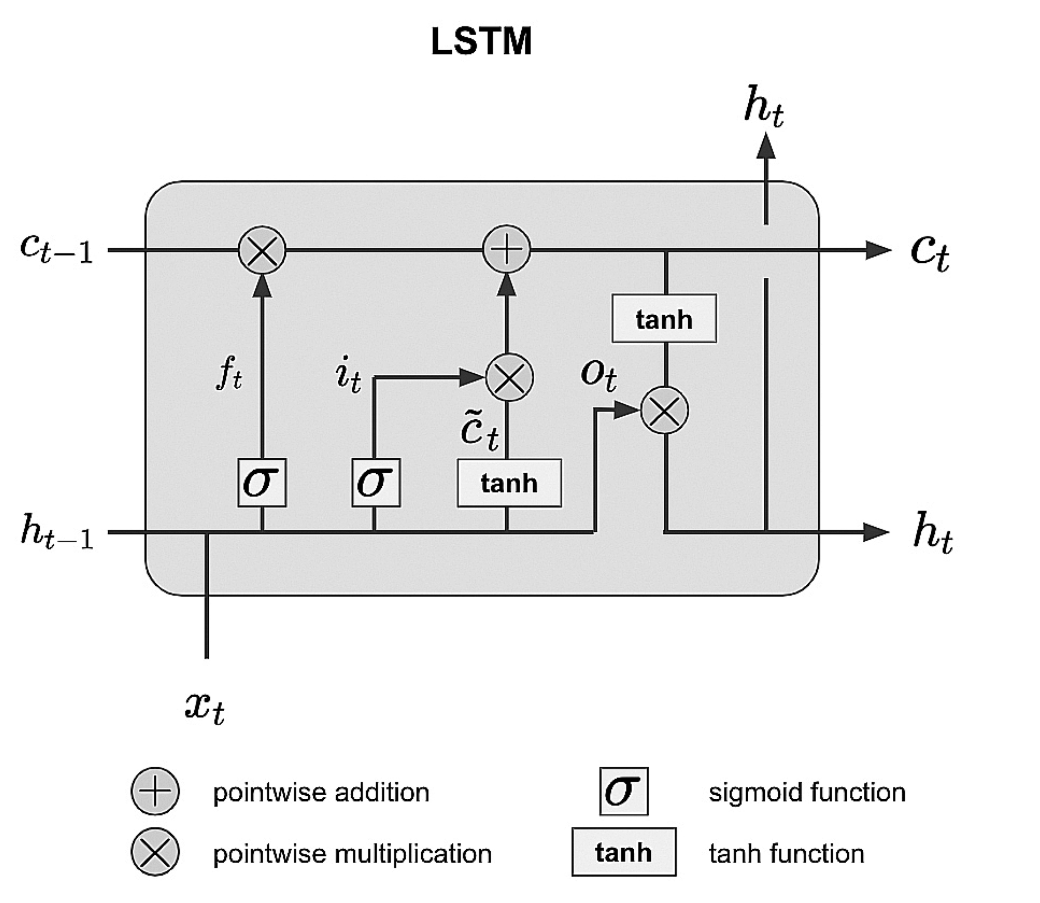

In [0]:
Image('/content/LSTM_Cell.png',width = 550)

## GRU

## 간단한 순환 신경망 구축